In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [45]:
# Setarea stilului grafic
sns.set(style="whitegrid")


In [46]:
# Încărcarea dataset-ului
train_data = pd.read_csv('train.csv')

In [47]:
# Vizualizarea primelor 5 rânduri din dataset
print(train_data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

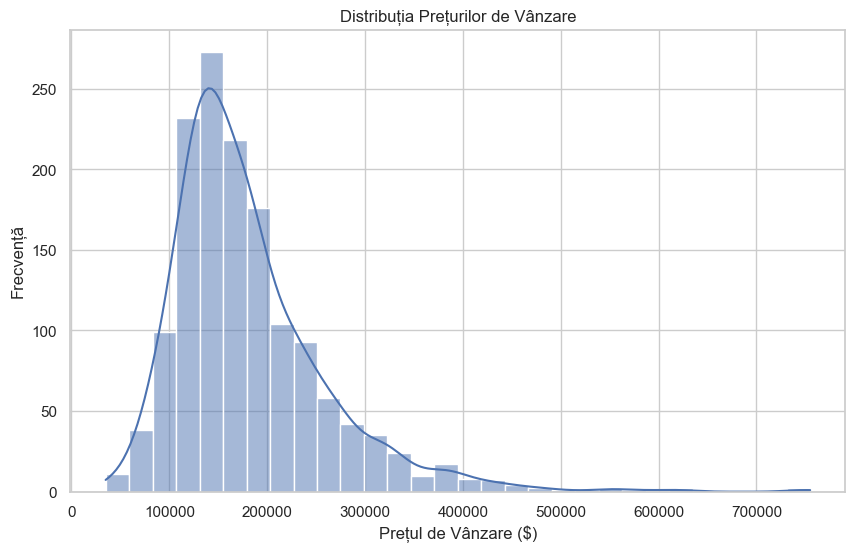

In [48]:
# 1. Vizualizarea distribuției prețurilor
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], bins=30, kde=True)
plt.title('Distribuția Prețurilor de Vânzare')
plt.xlabel('Prețul de Vânzare ($)')
plt.ylabel('Frecvență')
plt.show()

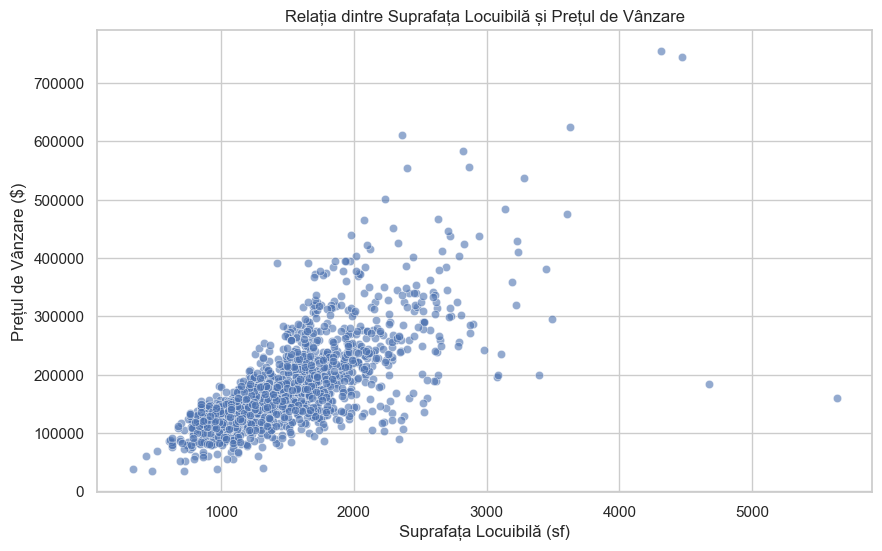

In [49]:
# 2. Vizualizarea relației dintre GrLivArea (suprafața locuibilă) și SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='GrLivArea', y='SalePrice', alpha=0.6)
plt.title('Relația dintre Suprafața Locuibilă și Prețul de Vânzare')
plt.xlabel('Suprafața Locuibilă (sf)')
plt.ylabel('Prețul de Vânzare ($)')
plt.show()


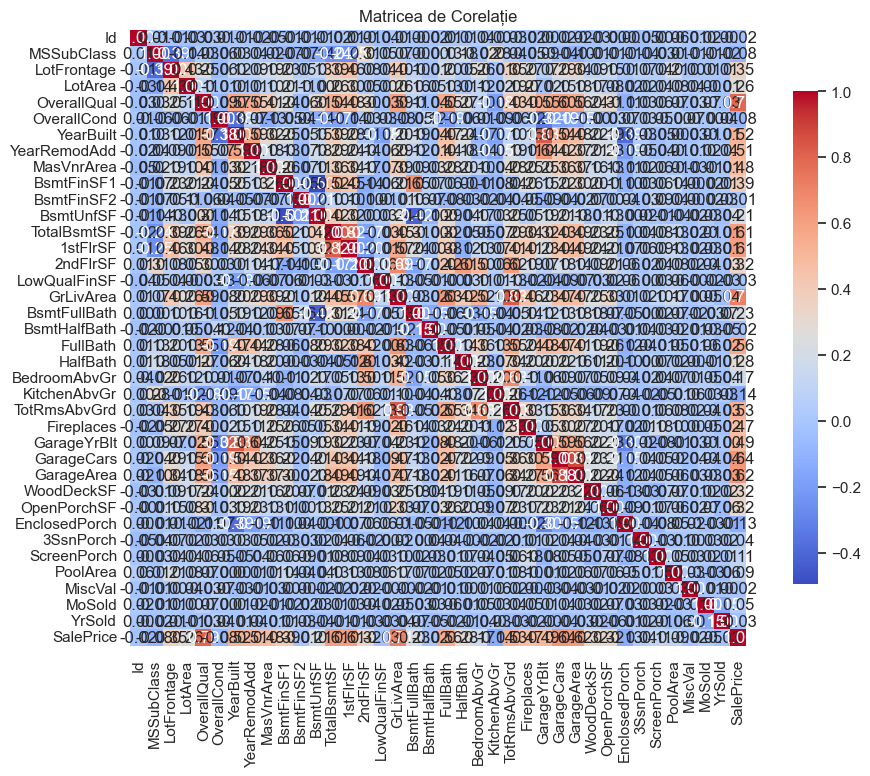

In [50]:
# 3. Harta de căldură pentru corelațiile dintre variabilele numerice
numeric_data = train_data.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matricea de Corelație')
plt.show()

In [51]:
# Preprocesarea datelor
# Selectarea caracteristicilor relevante și a etichetei
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

In [52]:
# Identificarea variabilelor categorice și numerice
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

In [53]:
# Tratarea valorilor lipsă
X[numeric_features] = X[numeric_features].fillna(X[numeric_features].mean())
X[categorical_features] = X[categorical_features].fillna('Missing')

In [54]:
# Crearea unui pipeline pentru preprocesare și modelare
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [55]:
# Crearea modelului
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])


In [56]:
# Împărțirea datelor în seturi de antrenament și testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
# Antrenarea modelului
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Id', 'MSSubClass',
                                                   'LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', '...
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [58]:
# Predicția pe setul de testare
y_pred = model.predict(X_test)

In [59]:
# Evaluarea modelului
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 862439781.3023188
R^2 Score: 0.8875615250242931


In [60]:
# Vizualizarea importanței caracteristicilor
# Obținerea importanței caracteristicilor
feature_importances = model.named_steps['regressor'].feature_importances_

In [61]:
# Obținerea numelui caracteristicilor
# Numele caracteristicilor numerice rămân aceleași
numeric_feature_names = preprocessor.transformers_[0][2]  # Este deja o listă


In [62]:
# Obținerea numelui caracteristicilor categorice generate de OneHotEncoder
categorical_feature_names = model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)


In [63]:
# Combinarea numelui caracteristicilor numerice și categorice
feature_names = np.concatenate([numeric_feature_names, categorical_feature_names])


In [64]:
# Crearea unui DataFrame pentru importanțele caracteristicilor
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


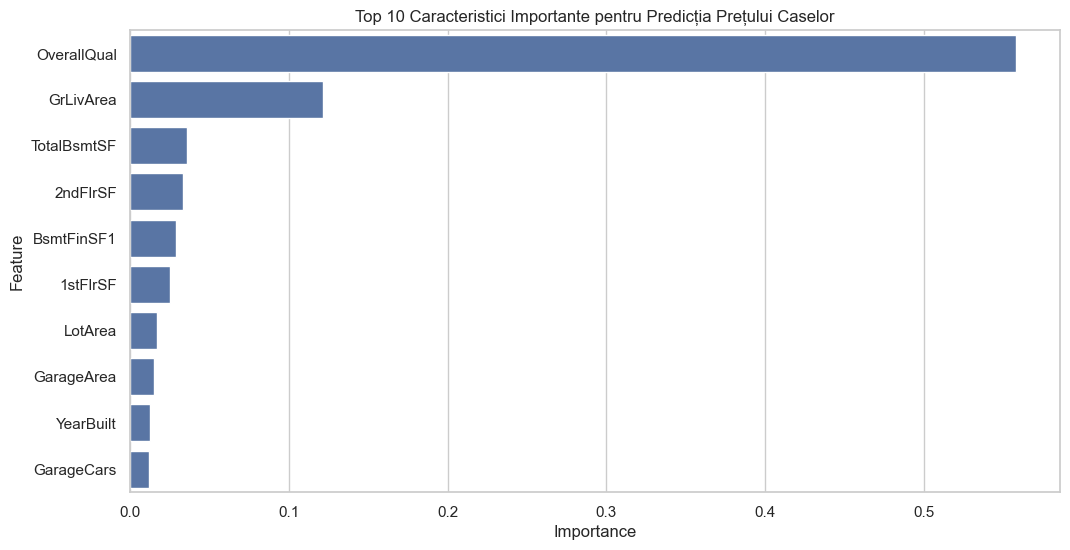

In [65]:
# Plotarea importanței caracteristicilor
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')
plt.title('Top 10 Caracteristici Importante pentru Predicția Prețului Caselor')
plt.show()